# Testing with the Quantum Fourier Transform

**By:** Arjun Bhamra

### Explaining the Discrete Fourier Transform and Quantum Fourier Transform

Both the **Discrete Fourier Transform** (DFT) and **Quantum Fourier Transform** (QFT) are *change of basis* functions; the DFT converts from the "time" basis to the "frequency", or *fourier*, basis, and the QFT does something similar. A quantum analog is converting from the $Z$ basis in the Bloch sphere, where you can measure in $|0\rangle$ and $|1\rangle$, and the Hadamard (or $X$) basis, where you measure in $|+\rangle$ and $|-\rangle$.

**DFT:**
The Discrete Fourier Transform performs the mapping $x=\begin{bmatrix}x_0 \\ x_1 \\ \vdots \\ x_{N-1}\end{bmatrix} \xrightarrow{DFT} y=\begin{bmatrix}y_0 \\ y_1 \\ \vdots \\ y_{N-1}\end{bmatrix}$ given by the function: 

$$y_k = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} x_j \cdot \omega^{jk}$$

where $\omega^{jk} = e^{2\pi i \frac{kj}{N}}$.

**QFT:**
The Quantum Fourier Transform performs a similar mapping. Given a state $|\psi\rangle = \sum_{j=0}^{N-1}a_j|j\rangle$, the QFT maps it to $|\phi\rangle = \sum_{k=0}^{N-1}b_k|k\rangle$, where:

$$b_k = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} a_j \cdot e^{2\pi i \frac{kj}{N}}$$.

This is essentially the DFT acting on the quantum state, and the formula we use is nearly identical. Equivalently, we can also show that the mapping is:

$$|j\rangle \xrightarrow{QFT} \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1}e^{2\pi i \frac{kj}{N}}|k\rangle$$.

**The Unitary Matrix for QFT:**
The way we can apply the QFT is by creating a unitary matrix that we will then apply to the system's statevector. In summation notation, we can represent this matrix as such:
$$U_{QFT} = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}\sum_{y=0}^{N-1} \omega^{jk}|y\rangle\langle x|$$
$U_{QFT}$ can also be represented with $H, C-R_{\frac{\pi}{2}},$ and $SWAP$ gates.

We can show that $U_{QFT}$, when expanded, takes the general form:

$$U_{QFT}=\frac{1}{\sqrt{N}}\begin{bmatrix}1 & 1 & 1 &\ldots & 1 \\1 & \omega^{(1)(1)} & \omega^{(2)(1)} & \ldots & \omega^{(N-1)(1)} \\1 & \omega^{(1)(2)} & \omega^{(2)(2)} & \ldots & \omega^{(N-1)(2)} \\ \vdots & \vdots & \vdots & & \vdots \\1 & \omega^{(1)(N-1)} & \omega^{(2)(N-1} & \ldots & \omega^{(N-1)(N-1)}\end{bmatrix}$$
for $\omega^{jk} = e^{2\pi i \frac{xy}{N}}$ as previously shown (**Note:** I've only replaced $kj$ with $xy$ for clarity given the previous summation definition, but it is, in effect, the same operation.

### Imports

In [15]:
import qiskit as q
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.extensions import UnitaryGate
from qiskit.extensions import Snapshot

In [6]:
IBMQ.load_account()
from qiskit.providers.ibmq import least_busy

/opt/anaconda3/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


### Making the Code

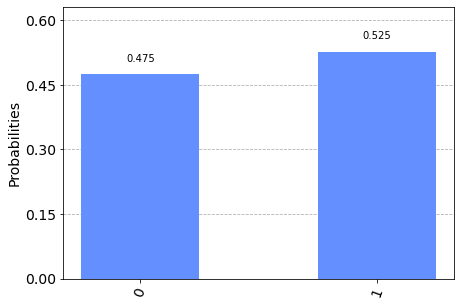

In [16]:
num_qubits = 1 #number of qubits
n=2**num_qubits

#creating the circuit
qr = q.QuantumRegister(num_qubits, 'q')
cr = q.ClassicalRegister(num_qubits, 'c')
qc = q.QuantumCircuit(qr, cr)

#create the unitary gate for QFT
qft_gate = (1/np.sqrt(n))*np.ones((n,n)).astype(np.complex)#initially

for j in range(n):
    for k in range(n):
        qft_gate[j][k]*=np.e**(2*np.pi*1j*((j*k)/n))
        
#print(qft_gate)
QFT = UnitaryGate(qft_gate, label="QFT")

qc.append(QFT, qr[:num_qubits])

qc.measure(qr[:num_qubits], cr[:num_qubits])

#qc.draw('mpl')

qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(qc)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
counts = answer

plot_histogram(counts)

#Note here that the QFT is having the same effect as the Hadamard because the 1 qubit QFT IS A HADAMARD!